In [232]:
import matplotlib.pyplot as plt
import numpy as np
from os import sep

from settings import DIR_DATA, DIR_OUTPUT, DIR_MODELS
from plotting import image_fancy

# Nov 10 - Build and save PCA on dataset

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

from data_process import data_mnist, binarize_image_data, image_data_collapse
from settings import MNIST_BINARIZATION_CUTOFF


TRAINING, TESTING = data_mnist(binarize=True)
num_features = TRAINING[0][0].shape[0] ** 2
num_samples = len(TRAINING)


def PCA_on_dataset(num_samples, num_features, dataset=None, binarize=True, X=None):

    def get_X(dataset):
        X = np.zeros((len(dataset), num_features))
        for idx, pair in enumerate(dataset):
            elem_arr, elem_label = pair
            preprocessed_input = image_data_collapse(elem_arr)
            #if binarize:
            #    preprocessed_input = binarize_image_data(preprocessed_input, threshold=MNIST_BINARIZATION_CUTOFF)
            features = preprocessed_input
            X[idx, :] = features
        return X
    
    if X is None:
        X = get_X(dataset)
    
    pca = PCA(n_components=None, svd_solver='full')
    pca.fit(X)
    return pca    

Processing MNIST data: numpy_binarize = True


In [5]:
pca = PCA_on_dataset(num_samples, num_features, dataset=TRAINING)
pca_weights = pca.components_  # each ROW of the pca weights is like a pattern

In [6]:
# SAVE (transposed version)
fpath = DIR_MODELS + sep + 'pca_binarized_raw.npz'
np.savez(fpath, pca_weights=pca_weights.T)

NameError: name 'os' is not defined

In [ ]:
# LOAD
with open(fpath, 'rb') as f:
    pca_weights = np.load(fpath)['pca_weights']
    print(pca_weights)

In [ ]:
print(pca_weights.shape)
for idx in range(2):
    plt.imshow(pca_weights[:, idx].reshape(28,28))
    plt.show()

(784, 784)
(28, 28, 784)


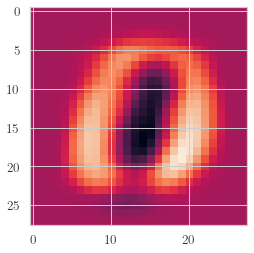

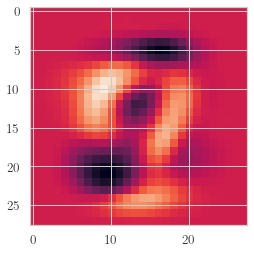

In [41]:
a = pca_weights.reshape(28,28,-1)
print(pca_weights.shape)
print(a.shape)
for idx in range(2):
    plt.imshow(a[:, :, idx])
    plt.show()

In [ ]:
from RBM_train import load_rbm_hopfield

k_pattern = 12
fname = 'hopfield_mnist_%d0_PCA.npz' % k_pattern
rbm = load_rbm_hopfield(npzpath=DIR_MODELS + os.sep + 'saved' + os.sep + fname)

In [ ]:
rbm_weights = rbm.internal_weights
print(rbm_weights.shape)
for idx in range(2):
    plt.imshow(rbm_weights[:, idx].reshape(28,28))
    plt.show()

# Nov 13 - For each digit (so 10x) Build and save PCA on dataset

In [20]:
from data_process import data_dict_mnist


# data_dict has the form: 
#    data_dict[0] = 28 x 28 x n0  of n0 '0' samples
#    data_dict[4] = 28 x 28 x n4  of n4 '4' samples
data_dict, category_counts = data_dict_mnist(TRAINING)

for idx in range(10):
    X = data_dict[idx].reshape((28**2, -1)).transpose()
    print(X.shape)
    num_samples = X.shape[0]
    num_features = X.shape[1]
    
    pca = PCA_on_dataset(num_samples, num_features, dataset=None, binarize=True, X=X)
    pca_weights = pca.components_  # each ROW of the pca weights is like a pattern
    
    # SAVE (transposed version)
    fpath = DIR_MODELS + sep + 'pca_binarized_raw_digit%d.npz' % idx
    np.savez(fpath, pca_weights=pca_weights.T)

category_counts:
 {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
Generating MNIST data dict
(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


[[-8.54285010e-19  1.70207739e-18  7.25777362e-20 ...  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-1.66533454e-16 -1.11022302e-16 -3.12250226e-17 ...  1.27313923e-02
  -1.03826861e-01  3.57731681e-02]
 [-2.22044605e-16 -2.77555756e-16  6.88468380e-18 ...  6.07524881e-02
   7.95052795e-02 -1.44445722e-02]
 ...
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00 -0.00000000e+00]]
(784, 784)


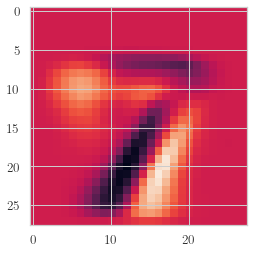

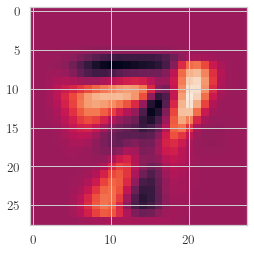

(784, 784)
(28, 28, 784)


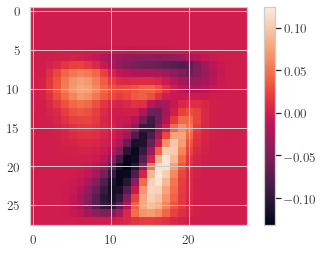

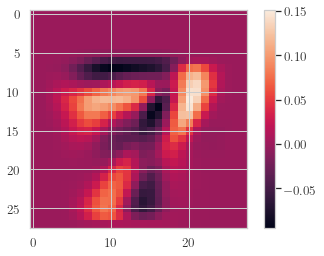

In [23]:
# LOAD
fpath = DIR_MODELS + sep + 'pca_binarized_raw_digit7.npz'
with open(fpath, 'rb') as f:
    pca_weights = np.load(fpath)['pca_weights']
    print(pca_weights)
    
print(pca_weights.shape)
for idx in range(2):
    plt.imshow(pca_weights[:, idx].reshape(28,28))
    plt.colorbar()
    plt.show()
    
    
a = pca_weights.reshape(28,28,-1)
print(pca_weights.shape)
print(a.shape)
for idx in range(2):
    plt.imshow(a[:, :, idx])
    plt.show()

# Inspect models/poe npz files

['Q', 'proj_remainder', 'pattern_labels', 'xi_image']


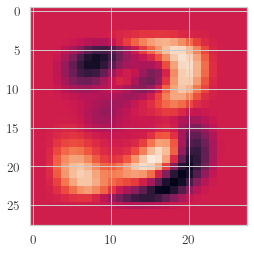

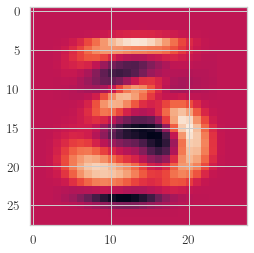

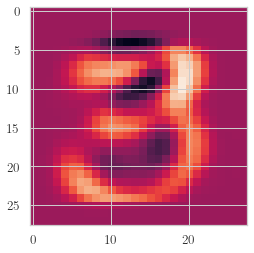

In [34]:
DIR_POE = 'models' + sep + 'poe'
fpath = DIR_POE + sep + 'hopfield_digit3_p1000_1000_pca.npz'
with open(fpath, 'rb') as f:
    fcontents = np.load(fpath)
    print(fcontents.files)
    weights = fcontents['Q']
    for idx in range(3):
        plt.imshow(weights[:, idx].reshape(28, 28))
        plt.show()

# Nov 15 - Distribution of images in the dataset

In [3]:
from data_process import data_dict_mnist
from RBM_train import load_rbm_hopfield

# data_dict has the form: 
#    data_dict[0] = 28 x 28 x n0  of n0 '0' samples
#    data_dict[4] = 28 x 28 x n4  of n4 '4' samples
data_dict, category_counts = data_dict_mnist(TRAINING)

Processing MNIST data: numpy_binarize = False
category_counts:
 {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}
Generating MNIST data dict


In [4]:
# load 10 target patterns
k_choice = 1
p = k_choice * 10
N = 28**2
fname = 'hopfield_mnist_%d0%s.npz' % (k_choice, '_hebbian')
rbm_hebbian = load_rbm_hopfield(npzpath='models' + sep + 'saved' + sep + fname)
weights_hebbian = rbm_hebbian.internal_weights
XI = weights_hebbian
PATTERNS = weights_hebbian * np.sqrt(N)

LOADING: models\saved\hopfield_mnist_10_hebbian.npz


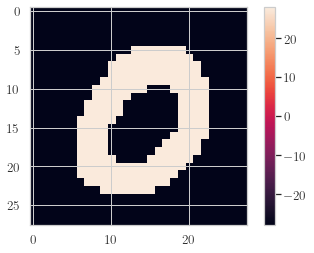

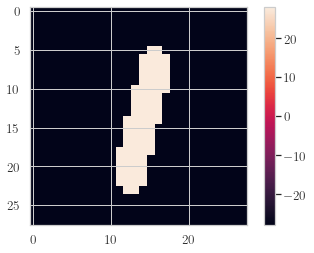

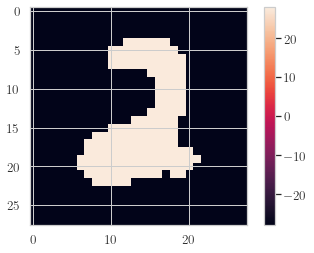

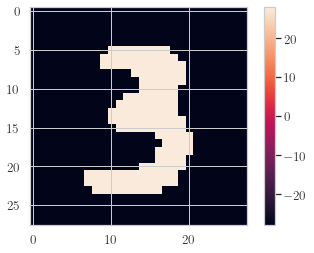

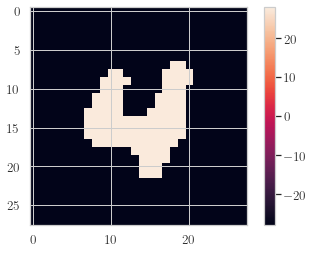

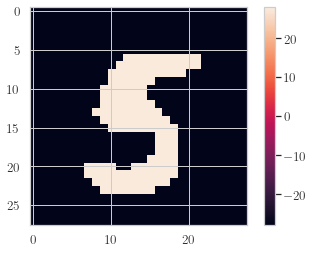

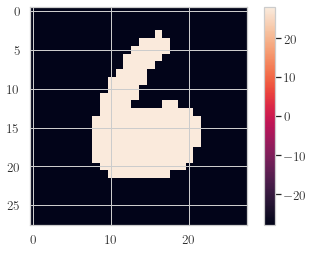

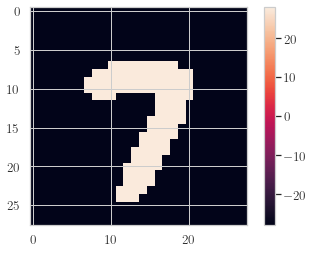

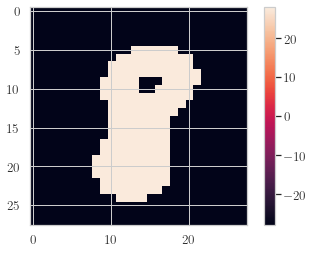

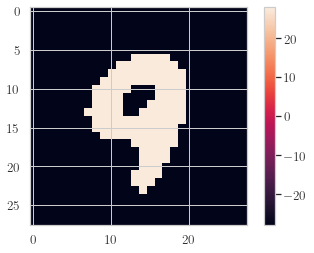

In [5]:
for mu in range(p):
    pattern_mu = PATTERNS[:, mu] * np.sqrt(N)
    #plt.figure(figsize=(2,12))
    plt.imshow(pattern_mu.reshape(28,28), interpolation='None')
    plt.colorbar()
    plt.show()

In [15]:
# PLAN: for each class
#  1) look at all data from the class
#  2) look at hamming distance of each digit from the class (max 28^2=784)
#  3) ...

def hamming_distance(x, y):
    prod = x * y
    dist = 0.5 * np.sum(1 - prod)
    return dist


def build_Jij(patterns):
    # TODO remove self-interactions? no RBM has them
    A = np.dot(patterns.T, patterns)
    A_inv = np.linalg.inv(A)
    Jij = np.dot(patterns, 
                 np.dot(A_inv, patterns.T))
    return Jij

J_INTXN = build_Jij(PATTERNS)
               
def energy_fn(state_vector):
    scaled_energy = -0.5 * np.dot(state_vector,
                                  np.dot(J_INTXN, state_vector))
    return scaled_energy
           
def get_hamming_histogram(X, target_state):
    # given matrix of states, compute distance to the target state for all
    # plot the histogram
    if len(X.shape) == 3:
        assert X.shape[0] == 28 and X.shape[1] == 28
        X = X.reshape(28**2, -1)
    num_pts = X.shape[-1]
    dists = np.zeros(num_pts)
    for idx in range(num_pts):
        dists[idx] = hamming_distance(X[:, idx], target_state)
    return dists


def get_energy_histogram(X, target_state):
    # given matrix of states, compute distance to the target state for all
    # plot the histogram
    if len(X.shape) == 3:
        assert X.shape[0] == 28 and X.shape[1] == 28
        X = X.reshape(28**2, -1)
    num_pts = X.shape[-1]
    energies = np.zeros(num_pts)
    for idx in range(num_pts):
        energies[idx] = energy_fn(X[:, idx])
    return energies



Gather data

In [11]:
#for idx in range(10):
list_of_dists = []
list_of_energies = []

BETA = 2.0

# pick get_hamming_histogram OR get_energy_histogram
hist_fn = get_energy_histogram

for mu in range(p):
    target_state = PATTERNS[:, mu]

    dists_mu = get_hamming_histogram(data_dict[mu], target_state)
    print('class %d: min dist = %d, max dist = %d' % (mu, min(dists_mu), max(dists_mu)))
    list_of_dists.append(dists_mu)
    
    energies_mu = get_energy_histogram(data_dict[mu], target_state)
    list_of_energies.append(energies_mu)
    
    #boltz_mu = np.exp(- BETA * energies_mu)
    #list_of_boltz.append(boltz_mu)
    

class 0: min dist = 29, max dist = 207
class 1: min dist = 10, max dist = 174
class 2: min dist = 37, max dist = 201
class 3: min dist = 33, max dist = 202
class 4: min dist = 36, max dist = 221
class 5: min dist = 44, max dist = 217
class 6: min dist = 15, max dist = 229
class 7: min dist = 24, max dist = 212
class 8: min dist = 21, max dist = 224
class 9: min dist = 29, max dist = 234


Plot data

In [17]:
outdir = 'output' + sep + 'ICLR_nb'

D_RANGE = (0,250)
E_RANGE = (-0.5 * 28**2, -100)
#B_RANGE = 

for mu in range(p):
    dists_by_mu = list_of_dists[mu]
    energies_by_mu = list_of_energies[mu]

    #boltz_by_mu = list_of_boltz[mu]

    n, bins, _ = plt.hist(dists_by_mu, range=D_RANGE, bins=50, density=True)
    plt.title('hamming distances (pattern: %d)' % mu)
    plt.savefig(outdir + sep + 'dist_hist_mu%d.jpg' % mu)
    plt.close()
    
    plt.hist(energies_by_mu, range=E_RANGE, bins=50, density=True)
    plt.title('energies (pattern: %d)' % mu)
    plt.axvline(x=-0.5 * 28**2)
    plt.savefig(outdir + sep + 'energy_hist_mu%d.jpg' % mu)   
    plt.close()
    
    
    scale_factors = np.array([rescaler(i) for i in bins[:-1]])
    
    
    counts, bins = np.histogram(dists_by_mu, bins=50)
    plt.hist(bins[:-1], bins, weights=scale_factors * counts)
    #plt.hist(dists_by_mu, range=E_RANGE, bins=bins, density=True, weights=scale_factors)
    plt.title('scaled dists (pattern: %d)' % mu)
    #plt.axvline(x=-0.5 * 28**2)
    plt.savefig(outdir + sep + 'scaled_dists_hist_mu%d.jpg' % mu)   
    plt.close()
    
    
    #plt.hist(boltz_by_mu, bins=50, density=True)
    #plt.title('boltzmann weights (pattern: %d)' % mu)
    #plt.savefig(outdir + sep + 'boltz_hist_mu%d.jpg' % mu)
    #plt.close()
    
    

c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


(28, 28, 6742)


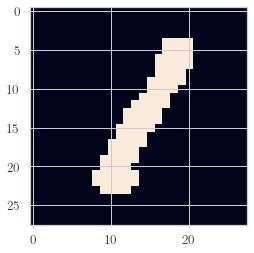

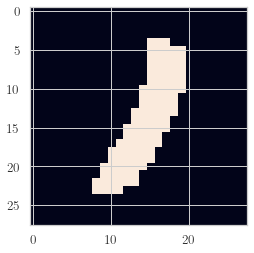

42.0


In [72]:
idx_a = 7
idx_b = 12

print(data_dict[1].shape)
x1 = data_dict[1][:,:,idx_a].reshape(28**2)
x2 = data_dict[1][:,:,idx_b].reshape(28**2)
plt.imshow(data_dict[1][:,:,idx_a])
plt.show()
plt.imshow(data_dict[1][:,:,idx_b])
plt.show()

hd = np.sum(1 - x1 * x2) * 0.5
print(hd)

# (Nov 16, 2020) Distance distribution rescaled by hamming shell area

Want to rescale the observed data distance distibution by the 'volume' of states in 2^N space
The number of states a distance d away from a given state is:
$\displaystyle n(d) = {N \choose d}$
e.g. $n(0)=1, n(1)=N=784, n(2)=N(N-1)/2 = 306936, ... , n(N)=1$.

Note that: $n!=\Gamma(n+1)$

The (uniform) probability to be a distance $d$ away is then: $p(d) = 2^{-N} n(d)$

Example probabilities (log, direct):
d=0 -543.4273895589972 9.828413039545451e-237
d=1 -536.7629805386473 7.705475822999888e-234
d=2 -530.792995023216 3.01669378470576e-231


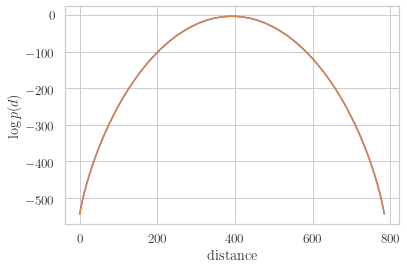

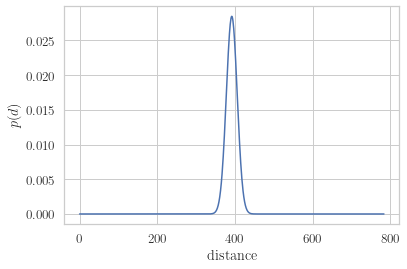

In [234]:
N0 = 28**2

from scipy.special import gamma, loggamma

def N_choose_k(N, k):
    num = gamma(N+1)
    den = gamma(N - k + 1) * gamma(k+1) 
    return num / den
    
def log_uniform_dist_prob(d, N=N0):    
    scale = -N *np.log(2)
    num = loggamma(N+1)
    den = loggamma(N - d + 1) + loggamma(d+1) 
    return scale + num - den

print('Example probabilities (log, direct):')
p0 = log_uniform_dist_prob(0, N=784)
p1 = log_uniform_dist_prob(1, N=784)
p2 = log_uniform_dist_prob(2, N=784)
print('d=0', p0, np.exp(p0))
print('d=1', p1, np.exp(p1))
print('d=2', p2, np.exp(p2))


d_arr = np.arange(N+1)
p_arr = log_uniform_dist_prob(d_arr)
plt.plot(d_arr, p_arr)
plt.xlabel(r'$\textrm{distance}$')
plt.ylabel(r'$\log p(d)$')

d_arr = np.arange(N+1)
logp_arr = log_uniform_dist_prob(d_arr)
plt.plot(d_arr, logp_arr)
plt.xlabel(r'$\textrm{distance}$')
plt.ylabel(r'$\log p(d)$')
plt.show(); plt.close()

d_arr = np.arange(0,N+1)
p_arr = np.exp(log_uniform_dist_prob(d_arr))
plt.plot(d_arr, p_arr)
plt.xlabel(r'$\textrm{distance}$')
plt.ylabel(r'$p(d)$')
plt.show(); plt.close()

We observe some data distribution $p_{data}^{(\mu)}(d)=$ "probability that sample $\mu$-images are a distance $d$ from pattern $\mu$". Here is $\log p(d)$ for $\mu=1$.

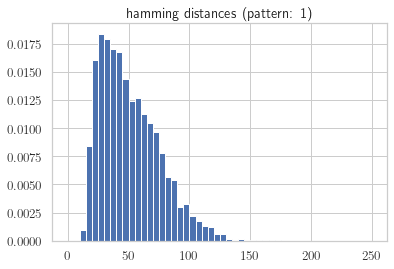

In [240]:
for mu in [1]:
    dists_by_mu = list_of_dists[mu]
    energies_by_mu = list_of_energies[mu]
    #boltz_by_mu = list_of_boltz[mu]
    n, bins, _ = plt.hist(dists_by_mu, range=(0,250), bins=50, density=True)
    plt.title('hamming distances (pattern: %d)' % mu)
    plt.show(); plt.close()

Consider rescaling this observed distribution by $p(d)$, the unbiased probability of being a distance $d$ away.

Define $g_{data}^{(\mu)}(d) \equiv p_{data}^{(\mu)}(d) / p(d)$.

For re-weighting the binning, we need to sum over all the distances in each bin. For example, suppose bin $i$ represents distance $0, 1, 2$. The "volume" of states is then:

$v(b_i) = n(0) + n(1) + n(2)$

Then for the corresponding $p(d)$ bin $b_i$, 

$g_{data}^{(\mu)}(b_i) \equiv 2^N p_{data}^{(\mu)}(b_i) / (n(0) + n(1) + n(2))$

And its $\log$, 

$\log g_{data}^{(\mu)}(b_i) \equiv N \log 2 + \log p_{data}^{(\mu)}(b_i) - \log (n(0) + n(1) + n(2))$

The final term is the $\log$ of a partial sum of binomial coefficients, which has no closed form.
Indirectly discussed on p102 of https://www.math.upenn.edu/~wilf/AeqB.pdf. Bottom of p160 is our quantity of interest. Relevant links

- https://mathoverflow.net/questions/17202/sum-of-the-first-k-binomial-coefficients-for-fixed-n
- https://math.stackexchange.com/questions/103280/asymptotics-for-a-partial-sum-of-binomial-coefficients
- https://mathoverflow.net/questions/261428/approximation-of-sum-of-the-first-binomial-coefficients-for-fixed-n?noredirect=1&lq=1

I will try the upper and lower bounds from the last link. 

In [236]:
outdir = 'output' + sep + 'ICLR_nb'

D_RANGE = (0,250)
E_RANGE = (-0.5 * 28**2, -100)


def build_bins(dmin, dmax, nn):
    # return nn+1 bin edges, for the nn bins
    gap = (dmax - dmin) / float(nn)
    return np.arange(dmin, dmax + 1e-5, gap)


def H_fn(x):
    return -x * np.log2(x) - (1-x) * np.log2(1-x)


def log_volume_per_bin(bins, upper=True):
    # NOTE: bounds only works for d <= N/2
    # assumes the right edge of each bin is inclusive (i.e. [0, 10] means [0, 10+eps])
    # TODO care for logs, at initial writing it is NOT log
    nn = len(bins) - 1
    
    def upper_bound(r):
        # partial sum of binomial coefficients (N choose k) form k=0 to k=r
        # see https://mathoverflow.net/questions/261428/approximation-of-sum-of-the-first-binomial-coefficients-for-fixed-n?noredirect=1&lq=1
        # see also Michael Lugo: https://mathoverflow.net/questions/17202/sum-of-the-first-k-binomial-coefficients-for-fixed-n
        x = r / float(N0)
        return 2 ** (N0 * H_fn(x))
    
    def lower_bound(r):
        num = upper_bound(r)
        den = np.sqrt(8 * r * (1 - float(r) / N0))
        return num/den
    
    if upper:
        bound = upper_bound
    else:
        bound = lower_bound
    
    
    approx_cumsum = np.zeros(nn)
    approx_vol_per_bin = np.zeros(nn)

    for idx in range(nn):
        bin_left = int(bins[idx])
        bin_right = int(bins[idx + 1])
        approx_cumsum[idx] = bound(bin_right)
    
    approx_vol_per_bin[0] = approx_cumsum[0]
    for idx in range(1, nn):
        approx_vol_per_bin[idx] = approx_cumsum[idx] - approx_cumsum[idx-1]
    
    log_approx_volume_per_bin = np.log(approx_vol_per_bin)
    
    return log_approx_volume_per_bin


NUM_BINS = 25
assert (D_RANGE[1] - D_RANGE[0]) % NUM_BINS == 0
GAP = (D_RANGE[1] - D_RANGE[0]) / NUM_BINS
BINS = build_bins(D_RANGE[0], D_RANGE[1], NUM_BINS)
BINS_MIDPTS = [0.5*(BINS[idx + 1] + BINS[idx]) for idx in range(NUM_BINS)]
print(BINS)

# scale the normed counts by the distance
approxUpper_log_vol_per_bin_arr = log_volume_per_bin(BINS, upper=True)
approxLower_log_vol_per_bin_arr = log_volume_per_bin(BINS, upper=False)


for mu in range(p):
    
    counts, bins = np.histogram(list_of_dists[mu], bins=BINS)
    
    
    # Plot p_data(d)
    normed_counts, _, _ = plt.hist(bins[:-1], bins, weights=counts, density=True)
    plt.title(r'$p_{data}(d)$ (pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'normed_dists_hist_mu%d.jpg' % mu)   
    plt.close()
    
    # Plot log p_data(d)
    log_normed_counts, _, _ = plt.hist(bins[:-1], bins, weights=counts, density=True, log=True)
    plt.title(r'$\log p_{data}(d)$ (pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'log_normed_dists_hist_mu%d.jpg' % mu)   
    plt.close()

    
    #scaled_log_normed_counts = ...
    print(len(normed_counts), normed_counts.shape)
    print(len(bins[:-1]), bins.shape)
    scaled_appxUpper_log_normed_counts = N0 * np.log(2) + np.log(normed_counts) - approxUpper_log_vol_per_bin_arr
    scaled_appxLower_log_normed_counts = N0 * np.log(2) + np.log(normed_counts) - approxLower_log_vol_per_bin_arr

    
    # Plot log g_data(d), upper and lower bound versions
    plt.bar(BINS_MIDPTS, scaled_appxUpper_log_normed_counts, color='#2A63B1', width=GAP)
    plt.title(r'$\log g_{data}(d)$ (upper; pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'scaled_appxUpper_log_normed_dists_hist_mu%d.jpg' % mu)   
    plt.close()
    
    plt.bar(BINS_MIDPTS, scaled_appxLower_log_normed_counts, color='#2A63B1', width=GAP)
    plt.title(r'$\log g_{data}(d)$ (lower; pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'scaled_appxLower_log_normed_dists_hist_mu%d.jpg' % mu)   
    plt.close()

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250.]
25 (25,)
25 (26,)


c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: divide by zero encountered in log


25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)
25 (25,)
25 (26,)


troubleshooting NaN: do the whole N range of 0 to 784 split into 28size bins

Have function which computes for each distance the average volume / log volume (more stable). Can bin later. 

In [241]:
N = 28**2
D_RANGE = (0,N)

NUM_BINS = N + 1   # 28
if NUM_BINS == N+1:
    GAP = 1
    BINS = np.arange(NUM_BINS)
    BINS_MIDPTS = [0.5*(BINS[idx + 1] + BINS[idx]) for idx in range(NUM_BINS-1)]
else:
    assert (D_RANGE[1] - D_RANGE[0]) % NUM_BINS == 0
    GAP = (D_RANGE[1] - D_RANGE[0]) / NUM_BINS
    BINS = build_bins(D_RANGE[0], D_RANGE[1], NUM_BINS)
    BINS_MIDPTS = [0.5*(BINS[idx + 1] + BINS[idx]) for idx in range(NUM_BINS)]
#print(BINS)


def log_volume_per_dist(dists, upper=True):
    assert len(dists) == N + 1
    nn = len(dists)
    
    def upper_bound(r):
        x = r / float(N0)
        return 2 ** (N0 * H_fn(x))
    
    def lower_bound(r):
        num = upper_bound(r)
        den = np.sqrt(8 * r * (1 - float(r) / N0))
        return num/den
    
    if upper:
        bound = upper_bound
    else:
        bound = lower_bound
    
    approx_cumsum = np.zeros(nn)
    approx_vol_per_dist = np.zeros(nn)

    # know first/last value is "1"
    approx_cumsum[0] = 1
    approx_cumsum[N] = 2**N
    
    # use symmetry wrt midpoint N/2.0    
    assert N % 2 == 0
    midpt = int(N / 2)
    for idx in range(1, midpt + 1):
        idx_reflect = N - idx
        approx_cumsum[idx] = bound(idx)
        approx_cumsum[idx_reflect] = approx_cumsum[N] - approx_cumsum[idx]
        #print('loop1_cumsum', idx, approx_cumsum[idx], idx_reflect, approx_cumsum[idx_reflect])
    
    approx_vol_per_dist[0] = approx_cumsum[0]
    approx_vol_per_dist[N] = 1.0
    for idx in range(1, midpt + 1):
        idx_reflect = N - idx
        approx_vol_per_dist[idx] = approx_cumsum[idx] - approx_cumsum[idx-1]
        approx_vol_per_dist[idx_reflect] = approx_vol_per_dist[idx]
        #print('log_volume_per_dist', idx, idx_reflect, approx_vol_per_dist[idx], approx_vol_per_dist[idx])
    
    log_approx_volume_per_dist = np.log(approx_vol_per_dist)
    #print('log_approx_volume_per_dist')
    #print(log_approx_volume_per_dist)
    
    return log_approx_volume_per_dist, approx_vol_per_dist, approx_cumsum


def log_volume_per_bin(bins):
    nn = len(bins) - 1
    
    def upper_bound(r):
        x = r / float(N0)
        return 2 ** (N0 * H_fn(x))
   
    bound = upper_bound
    
    approx_cumsum = np.zeros(nn)
    approx_vol_per_bin = np.zeros(nn)

    for idx in range(nn):
        bin_left = int(bins[idx])
        bin_right = int(bins[idx + 1])
        approx_cumsum[idx] = bound(bin_right)
        print('loop1_cumsum', idx, bin_right, approx_cumsum[idx])
    
    approx_vol_per_bin[0] = approx_cumsum[0]
    for idx in range(1, nn):
        approx_vol_per_bin[idx] = approx_cumsum[idx] - approx_cumsum[idx-1]
        print('log_volume_per_bin', idx, approx_vol_per_bin[idx], approx_cumsum[idx])
    
    log_approx_volume_per_bin = np.log(approx_vol_per_bin)
    print('log_approx_volume_per_bin')
    print(log_approx_volume_per_bin)
    
    return log_approx_volume_per_bin


# scale the normed counts by the distance
if NUM_BINS == N + 1:
    approxUpper_log_vol_per_bin_arr, approx_vol_per_dist, approx_cumsum = log_volume_per_dist(BINS, upper=True)
    approxLower_log_vol_per_bin_arr, approx_vol_per_dist, approx_cumsum = log_volume_per_dist(BINS, upper=False)
else:
    approxUpper_log_vol_per_bin_arr - log_volume_per_bin(BINS)


for mu in [1]:
    
    counts, bins = np.histogram(list_of_dists[mu], bins=np.arange(N+2))  # len error extend bins
    print('len(counts), len(bins)')
    print(len(counts), len(bins))
    
    normed_counts, _, _ = plt.hist(bins[:-1], bins, weights=counts, density=True)
    plt.close()
    
    # Plot p_data(d)
    plt.bar(BINS, normed_counts, color='red', width=0.8, linewidth=0)
    plt.title(r'$p_{data}(d)$ (pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'TEST_p_dists_hist_mu%d.pdf' % mu)   
    plt.close()
    
    # Plot log p_data(d)
    plt.bar(BINS, np.log(normed_counts), color='red', width=0.8, linewidth=0)
    plt.title(r'$\log p_{data}(d)$ (pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'TEST_logp_dists_hist_mu%d.pdf' % mu)   
    plt.close()
    
    #scaled_log_normed_counts = ...
    print(len(normed_counts), normed_counts.shape)
    print(len(bins[:-1]), bins.shape)
    scaled_appxUpper_log_normed_counts = N0 * np.log(2) + np.log(normed_counts) - approxUpper_log_vol_per_bin_arr
    scaled_appxLower_log_normed_counts = N0 * np.log(2) + np.log(normed_counts) - approxLower_log_vol_per_bin_arr
    
    
    print('bins_right')
    print(bins[1:])
    
    print('normed_counts')
    print(normed_counts)
    
    
    print('approxUpper_log_vol_per_bin_arr')
    print(approxUpper_log_vol_per_bin_arr)
    
    print('scaled_appxUpper_log_normed_counts')
    print(scaled_appxUpper_log_normed_counts)
    
    # Plot log g_data(d), upper and lower bound versions
    plt.bar(BINS, scaled_appxUpper_log_normed_counts, color='#2A63B1', width=0.8, linewidth=0)
    plt.title(r'$\log g_{data}(d)$ (upper; pattern: %d)' % mu)
    #plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlim(0,100)
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'TEST_scaled_appxUpper_log_normed_dists_hist_mu%d.pdf' % mu)   
    plt.close()
    
    plt.bar(BINS, scaled_appxLower_log_normed_counts, color='#2A63B1', width=0.8, linewidth=0)
    plt.title(r'$\log g_{data}(d)$ (upper; pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'TEST_scaled_appxLower_log_normed_dists_hist_mu%d.pdf' % mu)   
    plt.close()
    
    plt.bar(BINS, np.exp(scaled_appxLower_log_normed_counts), color='green', width=0.8, linewidth=0)
    plt.title(r'$\log g_{data}(d)$ (upper; pattern: %d)' % mu)
    plt.xlim(D_RANGE[0], D_RANGE[1])
    plt.xlabel(r'$\textrm{Hamming distance, d}$')
    plt.savefig(outdir + sep + 'TEST_scaled_appxLower_normed_dists_hist_mu%d.pdf' % mu)   
    plt.close()

c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in log


len(counts), len(bins)
785 786


c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:122: RuntimeWarning: divide by zero encountered in log


785 (785,)
785 (786,)
bins_right
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 2

c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:132: RuntimeWarning: divide by zero encountered in log
c:\users\matts\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in log


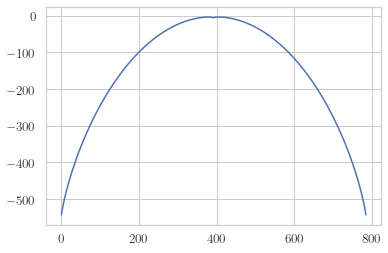

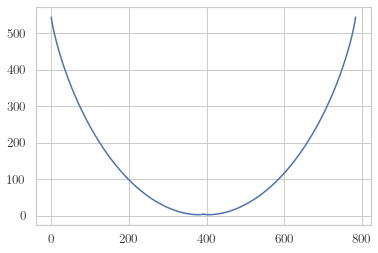

In [238]:
plt.plot(range(784+1), approxUpper_log_vol_per_bin_arr - N*np.log(2))
plt.show(); plt.close()

plt.plot(range(784+1), N*np.log(2) - approxUpper_log_vol_per_bin_arr)
plt.show(); plt.close()

In [239]:
print(counts)

[  0   0   0   0   0   0   0   0   0   0   2   2   9   7  13  38  44  53
  60  89 104  84 101 118 135 120 134 133 124 110 120 123 112 127 124 129
  98 116 130 103 114 104 104 119 125 113 106  97  72  97  90  81  90  88
  71  85  95  79 101  69  84  78  70  78  70  73  82  60  74  64  51  70
  64  73  67  60  46  55  45  58  35  48  31  45  33  46  40  36  31  28
  21  25  18  18  18  14  26  29  25  15  16  16  18   9  14  18  13  11
   7  10   5  11  11  10   8   9   4  17   2   8   6   2   5   2   6   3
   5   4   3   4   0   2   0   1   1   0   2   0   0   1   1   0   1   1
   2   0   0   0   0   0   1   0   0   1   1   0   0   0   0   0   0   1
   1   0   0   0   1   0   0   0   0   0   0   0   1   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [254]:
a = np.array([[1,3,4],[1,3,4]])

scales = np.array([2,1,2])
print (a / scales)

[[0.5 3.  2. ]
 [0.5 3.  2. ]]


In [256]:
print(scales > 1)

[ True False  True]
